# Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [17]:
data=pd.read_csv('amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


#  Exploratory Data Analysis

In [18]:
# checking shape
print('shape=',data.shape)

shape= (3150, 5)


So we have 3150 rows and 5 columns in the datset.

In [20]:
# Checking counts of the 0 and 1 in feedback columns
print('0 and 1 counts',"\n",data.feedback.value_counts())

0 and 1 counts 
 1    2893
0     257
Name: feedback, dtype: int64


In [24]:
# New column for Length of verified_reviews
data['length']=data.verified_reviews.str.len()
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Now we can see one column 'length' has been added in the datset and giving length of the verified_reviews.

In [26]:
# converting all messages to lower case
data['verified_reviews']=data['verified_reviews'].str.lower()

In [27]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,love my echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [28]:
# Replace email addresses with 'email'
data['verified_reviews']=data['verified_reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                           'emailaddress')

In [29]:
# Replace URLs with 'webaddress'
data['verified_reviews']=data['verified_reviews'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                            'webaddress')

In [30]:
# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156)
data['verified_reviews']=data['verified_reviews'].str.replace(r'£|\$','dollers')

In [31]:
# Replace 10 didgit phone numbers(formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['verified_reviews']=data['verified_reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')

In [32]:
# replace numbers with 'numbr'
data['verified_reviews']=data['verified_reviews'].str.replace(r'\d+(\.\d+)?','numbr')

In [33]:
# Remove Punctuation
data['verified_reviews']=data['verified_reviews'].str.replace(r'[^\w\d\s]',' ')


# Replace whitespace between terms with a single space
data['verified_reviews']=data['verified_reviews'].str.replace(r'\s+', ' ')


# Remove Leading and trailing whitespace
data['verified_reviews']=data['verified_reviews'].str.replace(r'^\s+|\s+?$','')

In [35]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,13
1,5,31-Jul-18,Charcoal Fabric,loved it,1,9
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1,195
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my num...,1,172
4,5,31-Jul-18,Charcoal Fabric,music,1,5


# Removing Stopwords

In [36]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

data['verified_reviews']=data['verified_reviews'].apply(lambda x: ' '.join(
term for term in x.split() if term not in stop_words))

In [37]:
# New column (clean_length) after punctuations, stopwords removal
data['clean_length']=data.verified_reviews.str.len()
data.head()

,rating,date,variation,verified_reviews,feedback,length,clean_length
0,5,31-Jul-18,Charcoal Fabric,love echo,1,13,9
1,5,31-Jul-18,Charcoal Fabric,loved,1,9,5
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,195,109
3,5,31-Jul-18,Charcoal Fabric,lot fun thing numbr yr old learns dinosaurs co...,1,172,115
4,5,31-Jul-18,Charcoal Fabric,music,1,5,5


Now we can see the cleaned_lenth column is giving clean length of the verified_reviews data.

In [39]:
# Total Length removal
print('original length', data.length.sum())
print('claen length', data.clean_length.sum())

original length 415956
claen length 255310


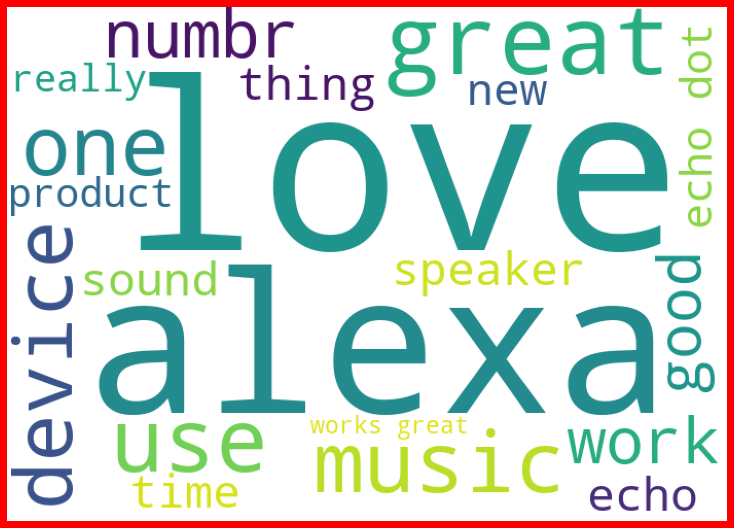

In [40]:
# Getting sense of Loud words in zero(positive)

from wordcloud import WordCloud

zero=data['verified_reviews'][data['feedback']==1]

cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(zero))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

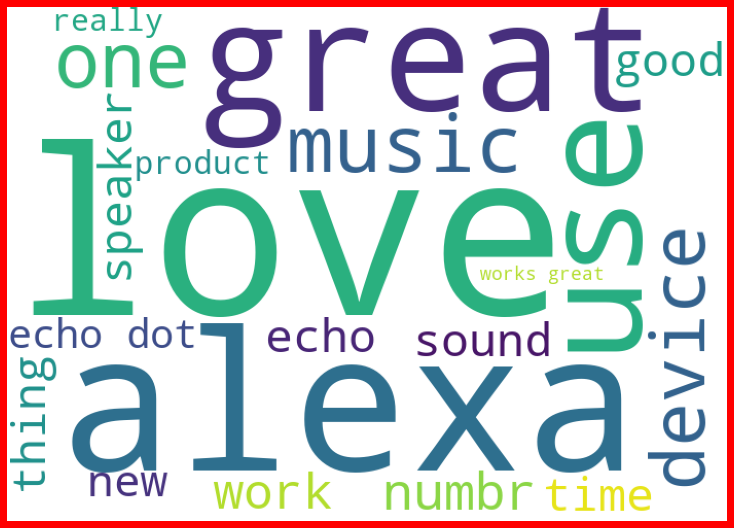

In [41]:
# Getting sense of Loud words in one(negative)

from wordcloud import WordCloud

one=data['verified_reviews'][data['feedback']==1]

cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [42]:
# 1. convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

tf_vec=TfidfVectorizer()

naive=MultinomialNB()

features=tf_vec.fit_transform(data['verified_reviews'])

x=features
y=data['feedback']

In [43]:
# train and predict
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

pred_y=naive.predict(x_test)

print('Final score',accuracy_score(y_test,pred_y))

Final score 0.9073604060913706


In [44]:
print("classification report",classification_report(y_test,pred_y))

classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.91      1.00      0.95       715

    accuracy                           0.91       788
   macro avg       0.45      0.50      0.48       788
weighted avg       0.82      0.91      0.86       788



In [45]:
# print confusion matrix 
print('confusion matrix',confusion_matrix(y_test,pred_y))


confusion matrix [[  0  73]
 [  0 715]]


In [46]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(naive,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.917142857142857
